In [ ]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

In [ ]:
!unzip face-mask-dataset.zip

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_9.jpg', 'with_mask_2565.jpg', 'with_mask_120.jpg', 'with_mask_3626.jpg', 'with_mask_2218.jpg']
['without_mask_713.jpg', 'without_mask_2820.jpg', 'without_mask_900.jpg', 'without_mask_2190.jpg', 'without_mask_1816.jpg']


In [14]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


## **creating labels for two class of images**

with mask --> 1
without mask --> 0

In [15]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [16]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Displaying images

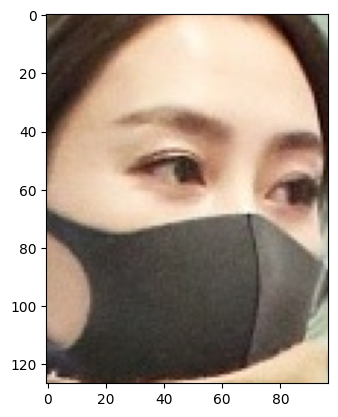

In [12]:
mask_img = mpimg.imread('/content/data/with_mask/' + with_mask_files[8])
plt.imshow(mask_img)


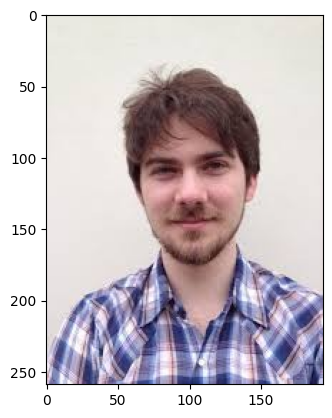

In [13]:
no_mask_img = mpimg.imread('/content/data/without_mask/' + without_mask_files[18])
plt.imshow(no_mask_img)

## Image processing

1. Resize Images

2. COnvert images to numpy arrays

In [20]:
# convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
    img = Image.open(with_mask_path + img_file)
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)
    data.append(img)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
    img = Image.open(without_mask_path + img_file)
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)
    data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[241, 200, 146],
        [243, 203, 149],
        [246, 207, 152],
        ...,
        [212, 209, 181],
        [194, 189, 170],
        [178, 172, 156]],

       [[242, 201, 147],
        [244, 204, 150],
        [245, 207, 152],
        ...,
        [200, 197, 167],
        [186, 181, 160],
        [172, 167, 149]],

       [[243, 204, 147],
        [245, 205, 149],
        [246, 207, 150],
        ...,
        [194, 191, 158],
        [183, 178, 154],
        [173, 168, 147]],

       ...,

       [[ 12,  12,  10],
        [ 15,  15,  12],
        [ 18,  19,  14],
        ...,
        [  8,   8,   6],
        [  9,   9,   7],
        [  9,   9,   7]],

       [[ 11,  10,   6],
        [ 14,  12,   9],
        [ 17,  17,  13],
        ...,
        [  8,   8,   6],
        [  9,   9,   7],
        [  9,   9,   7]],

       [[ 16,  15,  11],
        [ 18,  17,  13],
        [ 21,  21,  16],
        ...,
        [  8,   8,   6],
        [  9,   9,   7],
        [  9,   9,   7]]], dtype=uint8)
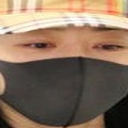

In [22]:
data[20]

In [24]:
# converting image list and labels to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
X_train.shape

(6042, 128, 128, 3)

### Scaling data

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Building CNN

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [29]:
num_of_classes = 2
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_of_classes, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)

Epoch 1/25
170/170 [==============================] - 9s 38ms/step - loss: 0.5218 - accuracy: 0.8472 - val_loss: 0.3444 - val_accuracy: 0.8727
Epoch 2/25
170/170 [==============================] - 6s 37ms/step - loss: 0.3477 - accuracy: 0.8755 - val_loss: 0.4785 - val_accuracy: 0.7554
Epoch 3/25
170/170 [==============================] - 6s 36ms/step - loss: 0.3493 - accuracy: 0.8804 - val_loss: 0.3887 - val_accuracy: 0.8860
Epoch 4/25
170/170 [==============================] - 6s 37ms/step - loss: 0.2566 - accuracy: 0.9071 - val_loss: 0.2779 - val_accuracy: 0.9074
Epoch 5/25
170/170 [==============================] - 6s 35ms/step - loss: 0.2078 - accuracy: 0.9220 - val_loss: 0.2160 - val_accuracy: 0.9107
Epoch 6/25
170/170 [==============================] - 6s 36ms/step - loss: 0.1954 - accuracy: 0.9283 - val_loss: 0.3766 - val_accuracy: 0.8579
Epoch 7/25
170/170 [==============================] - 6s 36ms/step - loss: 0.1972 - accuracy: 0.9266 - val_loss: 0.1855 - val_accuracy: 0.9273

## Model evaluation

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy: {}'.format(accuracy))

48/48 [==============================] - 0s 9ms/step - loss: 0.3092 - accuracy: 0.9292
Test Accuracy: 0.9291859865188599


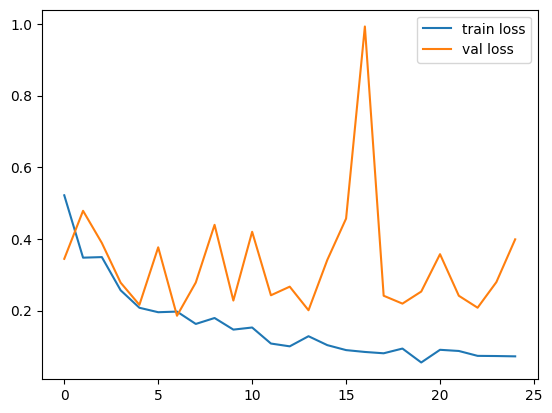

In [39]:
# plot the loss value

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

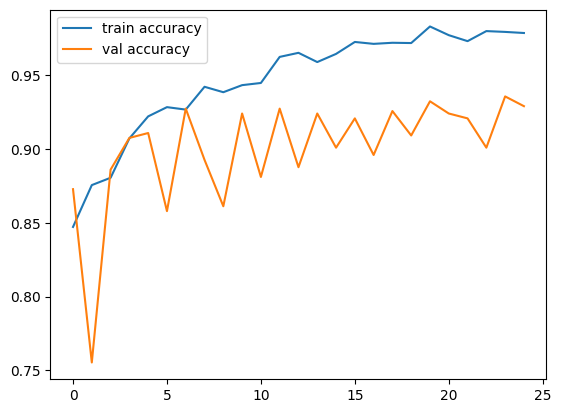

In [40]:
# plot accuray

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

Enter the path of the image: no_mask.jpg


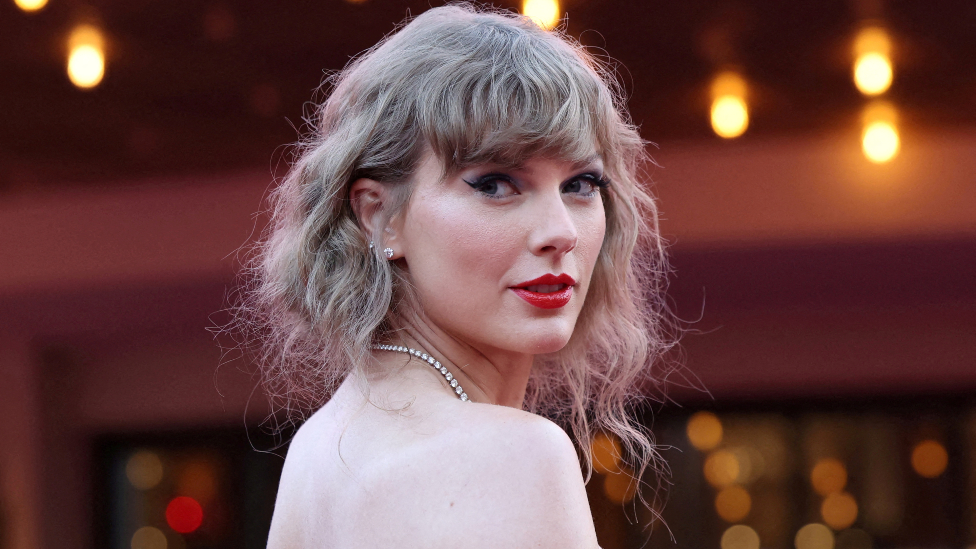

1/1 [==============================] - 0s 25ms/step
The person is not wearing mask


In [47]:
input_img_path = input('Enter the path of the image: ')
input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)
input_img = cv2.resize(input_img, (128, 128))

input_img_scaled = input_img/255
input_img_reshaped = np.reshape(input_img_scaled, [1, 128, 128, 3])

input_pred = model.predict(input_img_reshaped)
input_pred_label = np.argmax(input_pred)
if input_pred_label == 0:
    print('The person is wearing a mask')
else:
    print('The person is not wearing mask')